In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import make_blobs

In [4]:
X,y = make_blobs(n_samples=1000,centers=3 ,n_features=3)

In [5]:
X

array([[  5.77560679,  -8.6877579 , -10.36671586],
       [  5.78873429,  -8.65474151,  -9.64045544],
       [  2.77375056,  -8.37346546,  -9.70504096],
       ...,
       [  8.38398189,  -0.84573619,   8.63498723],
       [  8.68454994,  -2.14755954,   9.40837786],
       [ -3.98125656,  -6.12578775,  -6.81636864]], shape=(1000, 3))

In [6]:
y

array([2, 2, 2, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 0, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 1,
       2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2, 2, 1, 0, 0, 1, 0,
       2, 1, 0, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 0, 2, 2, 1, 2, 2, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 1, 0, 0, 1, 1, 1, 2, 0, 0, 2, 0,
       1, 2, 1, 1, 0, 2, 1, 0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 1, 2, 1, 1,
       2, 0, 1, 0, 1, 1, 2, 0, 2, 1, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 2, 0, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1,
       2, 0, 0, 2, 2, 2, 0, 1, 1, 0, 2, 1, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1,
       2, 2, 1, 0, 2, 2, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 2, 0, 1, 0, 2, 1,
       0, 0, 1, 1, 1, 1, 2, 0, 0, 1, 2, 0, 2, 0, 1, 1, 1, 0, 1, 2, 0, 2,
       1, 0, 2, 1, 0, 0, 2, 1, 0, 1, 1, 0, 1, 0, 2, 1, 2, 2, 1, 2, 1, 0,
       1, 2, 0, 1, 2, 1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1,

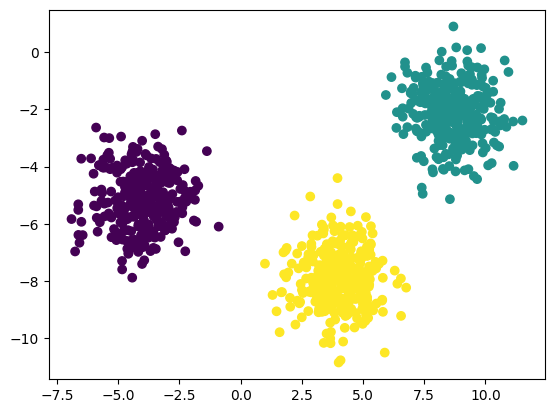

In [8]:
plt.scatter(X[:,0],X[:,1],c=y)

In [9]:
## standardization 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y ,train_size=0.33,random_state=42)

In [11]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
from sklearn.cluster import KMeans


In [13]:
## elbow method to select K value
wcss =[]
for k in range (1,11):
    Kmeans = KMeans(n_clusters=k,init="k-means++")
    Kmeans.fit(X_train_scaled)
    wcss.append(Kmeans.inertia_)

In [14]:
wcss

[989.9999999999995,
 267.7510474416206,
 69.40603957367233,
 59.20313620845113,
 46.96914623645274,
 36.76378088280044,
 33.63472619887492,
 29.395478927612924,
 27.177102045097158,
 24.65235922394432]

([<matplotlib.axis.XTick at 0x1f33ad819a0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

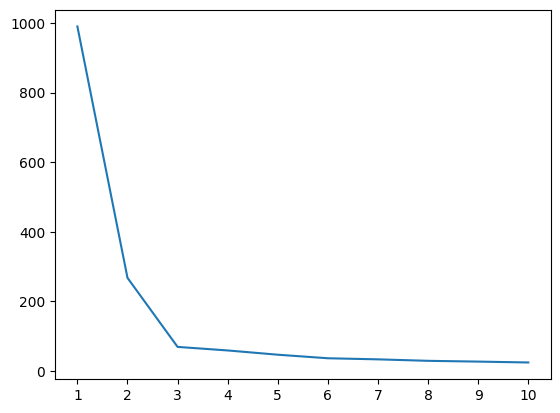

In [15]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))

In [16]:
Kmeans = KMeans(n_clusters=3,init="k-means++")

In [17]:
Kmeans.fit_predict(X_test_scaled)

array([1, 0, 1, 2, 0, 2, 1, 0, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2, 1, 0, 0, 1,
       1, 2, 1, 0, 1, 2, 2, 0, 2, 2, 1, 2, 2, 0, 0, 0, 1, 0, 0, 2, 1, 0,
       1, 1, 1, 1, 0, 2, 1, 2, 0, 1, 0, 0, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2,
       0, 0, 1, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 0, 2, 0,
       1, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 2, 1, 1, 0, 0, 2, 1, 1, 1, 2, 1,
       2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 1, 1, 2,
       0, 2, 1, 1, 2, 0, 0, 1, 1, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2,
       1, 2, 1, 0, 0, 1, 0, 2, 0, 1, 2, 1, 0, 1, 0, 0, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 0, 0, 2, 2, 2, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 2,
       2, 1, 2, 0, 1, 2, 0, 2, 1, 0, 2, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0,
       2, 2, 0, 0, 1, 1, 2, 0, 2, 0, 1, 0, 2, 1, 2, 0, 0, 0, 1, 2, 1, 0,
       0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 1, 0, 2, 0, 1, 2,
       2, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 0, 0, 0, 1,

In [18]:
y_pred= Kmeans.predict(X_test_scaled)

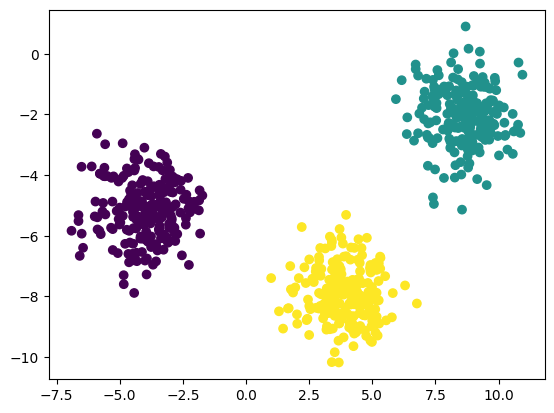

In [20]:
plt.scatter(X_test[:,0],X_test[:,1] ,c=y_pred)

In [21]:
## validation of the k value 
## kneelocator and Silhoutee scoring
!pip install kneed

In [23]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11),wcss,curve='convex',direction ="decreasing")

In [24]:
kl.elbow

np.int64(3)

In [25]:
## silhoutte scoring
from sklearn.metrics import silhouette_score

In [26]:
silhouette_coeff =[]
for k in range(2,11):
    Kmeans = KMeans(n_clusters=k,init="k-means++")
    Kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled,Kmeans.labels_)
    silhouette_coeff.append(score)

In [27]:
silhouette_coeff

[np.float64(0.6854099841823837),
 np.float64(0.744294014422),
 np.float64(0.5937211790128955),
 np.float64(0.49179323639149614),
 np.float64(0.3770295377399359),
 np.float64(0.35591926901756415),
 np.float64(0.33848770606140666),
 np.float64(0.3147476572546708),
 np.float64(0.304946210249087)]

([<matplotlib.axis.XTick at 0x1f342384b60>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

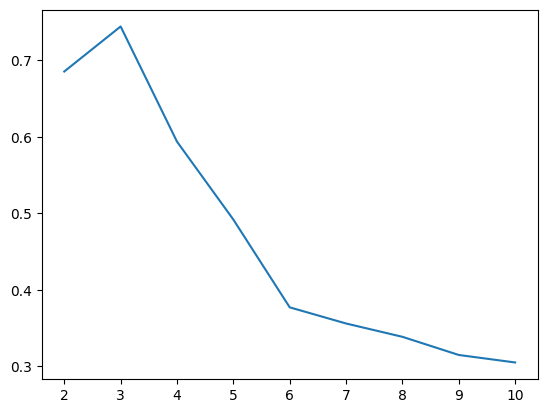

In [29]:
plt.plot(range(2,11),silhouette_coeff)
plt.xticks(range(2,11))